<a href="https://colab.research.google.com/github/saneshashank/eva_nn_01/blob/main/eva_nn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# import libraries
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [29]:
from torch.utils.data import Dataset # helps create dataset class
import numpy as np

class NumberMixture(Dataset):
  """
    Number Mixture clause produces a data which is a mixture of
    mnist images and random integer numbers between 0 to 9 (inclusive)
  """

  def __init__(self,mnist):
    self.data = mnist

  # returns image, random number, image label, sum of random number & number in
  # image
  def __getitem__(self,index):
    r = self.data[index] # image data
    v = np.random.randint(0,10) # random integor
    v = torch.tensor(v) # convert to tensor format
    # print(r[1]),print(r[0]) # uncomment to print values
    return r[0],v,r[1], r[1]+v

  def __len__(self):
    return len(self.data) 


In [30]:
# create MNIST dataset, which will be input to NumberMixture class
train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [31]:
train_set[0][0].shape,train_set[0][1]

(torch.Size([1, 28, 28]), 5)

In [32]:
# create number mixture object
num_mix =  NumberMixture(train_set) 

In [33]:
# look at first element
num_mix[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [34]:
# check one sample
sample = next(iter(num_mix))

In [35]:
img,number, label, sum = sample

label: 5
random number: tensor(1)
sum: tensor(6)


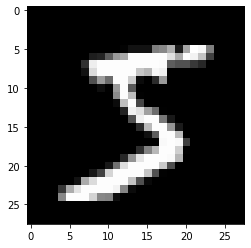

In [36]:
# vizualize the image and check that sum is correct
import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap='gray')
print('label:', label)
print('random number:', number)
print('sum:', sum)

In [37]:
# create a data loader
train_loader = torch.utils.data.DataLoader(num_mix,batch_size=2,shuffle=True)

In [38]:
# check one sample from data loader created
next(iter(train_loader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]]),
 tensor([2, 0]),
 tensor([8, 4]),
 tensor([10,  4])]

In [39]:
import torch.nn.functional as F
import torch.nn as nn

In [40]:
# F.one_hot(torch.tensor(1),num_classes=9)

In [41]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # set of layers dealing with image
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # 1st convolution layer
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) # 2nd convolution layer
    self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120) # 1st dense layer
    self.fc2 = nn.Linear(in_features=130, out_features=60) # 2nd dense layer that takes in concatenated vector (vector representing image + random number)
    self.out = nn.Linear(in_features=60, out_features=10) # output layer which maps to output 10 classes (numbers from 0-9)  
    
    # set of layers dealing with number as input
    self.embedding = nn.Embedding(10,10) # embedding layer to convert one hot encoded number to 10 dimensional vector
    self.fc1_1 = nn.Linear(in_features=10,out_features=10) # 1st dense layer
    self.fc2_1 = nn.Linear(in_features=10,out_features=10) # 2nd dense layer
    self.fc3_1 = nn.Linear(in_features=130,out_features=60) # 3rd dense layer that takes in concatenated vector (vector representing image + random number)
    self.out_1 = nn.Linear(in_features=60,out_features=19) # output layer which maps to outut 19 classes (sum values from 0-18 inclusive of zero)
  
  def forward(self, 
               t_1,# image input
               t_2 # number input
              ):
    # input layer
    x = t_1 # input for image
    x_1 = t_2 # input for number

    # print(x.shape) # uncommebt to check image shape

    # convert number input to embedding vector
    # x_1 = self.embedding(torch.tensor(t_2,dtype=torch.int64))
    x_1 = self.embedding(x_1.clone().detach())
    # print(x_1.shape) # uncommebt to check number vector shape
    
    x_1 = self.fc1_1(x_1) # 1st dense layer
    x_1 = F.relu(x_1) # activation
    x_1 = self.fc2_1(x_1) # 2nd dense layer
    x_1 = F.relu(x_1) # activation


    # conv1 layer
    x = self.conv1(x) # 1st convolution on image
    x = F.relu(x) # activation
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 28 | 24 | 12 # max pooling

    # conv2 layer
    x = self.conv2(x) # 2nd convolution on image
    x = F.relu(x) # activation
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 12 | 8 | 4 >> 12x4x4

    # reshape
    x = x.reshape(-1, 12 * 4 * 4)

    # fc1 layer
    x = self.fc1(x)
    x = F.relu(x)

    # print(f"num shape {x_1.shape}")
    # print(f"img tensor shape {x.shape}")

    # concatenate image & number vectors into a single vector
    x_concat = torch.concat([x,x_1],axis=-1)
    # print(f"x_concat shape {x_concat.shape}")

    # fc2 layer
    x = self.fc2(x_concat) # apply dense layer for image
    x = F.relu(x)

    # output layer
    x = self.out(x) # image class output

    # fc2 layer
    x_1 = self.fc3_1(x_concat) # apply dense layer for number
    x_1 = F.relu(x_1) 

    # output layer
    x_1 = self.out_1(x_1) # sum output
    
    return x,x_1

In [42]:
# check above works fine by creating the neural n/w
network = Network() 

In [43]:
# check output on single image and number as input
network(img.unsqueeze(0),number.unsqueeze(0))

(tensor([[ 0.0403,  0.0127,  0.0002, -0.1599, -0.1170,  0.1294,  0.0106,  0.2262,
          -0.0027, -0.0480]], grad_fn=<AddmmBackward0>),
 tensor([[ 0.0632,  0.1061, -0.1294, -0.1552, -0.0885,  0.1253,  0.0168,  0.0321,
           0.1065,  0.0728, -0.0345,  0.0919,  0.1724, -0.0772,  0.0681, -0.0951,
          -0.0470, -0.0480, -0.0968]], grad_fn=<AddmmBackward0>))

In [44]:
import torch.optim as optim

torch.set_grad_enabled(True)

In [45]:
# take single batch as input
images,numbers, labels, sums = next(iter(train_loader))

In [46]:
# test that everything works fine on a single batch
preds_1,preds_2 = network(images,numbers)
print(preds_1.shape), print(preds_2.shape)

torch.Size([2, 10])
torch.Size([2, 19])


(None, None)

In [47]:
# check loss on predicted image label and actual label
loss_1 = F.cross_entropy(preds_1, labels)
loss_1.item()

print(loss_1)

# check loss on predicted numbers sum and actual sum
loss_2 = F.cross_entropy(preds_2, sums)
loss_2.item()
print(loss_2)

tensor(2.4022, grad_fn=<NllLossBackward0>)
tensor(2.8414, grad_fn=<NllLossBackward0>)


In [48]:
# function to calculate the number of correct labels
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [49]:
# run the entire training loop
total_correct_labels = 0
total_correct_sums = 0
# initialize neural network
network = Network()
# create data loader
train_loader = torch.utils.data.DataLoader(num_mix,batch_size=100,shuffle=True)
# load optimizer
optimizer = optim.Adam(network.parameters(), lr=0.01) 

# run training for 10 epochs
for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images,numbers, labels, sums = batch 

        preds_1,preds_2 = network(images,numbers) # Pass Batch

        loss_1 = F.cross_entropy(preds_1, labels) # Calculate loss for image labels
        loss_2 = F.cross_entropy(preds_2, sums) # Calculate loss for number sum 

        # find the cumulative loss
        loss = loss_1 + loss_2

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct_labels += get_num_correct(preds_1, labels)
        total_correct_sums += get_num_correct(preds_2, sums)

    print(
        "epoch", epoch, 
        "total_correct_labels:", total_correct_labels, 
        "total_correct_sums:", total_correct_sums,
        "loss:", total_loss
    )

epoch 0 total_correct_labels: 56311 total_correct_sums: 47795 loss: 494.98781556636095
epoch 1 total_correct_labels: 115021 total_correct_sums: 105978 loss: 118.19812903553247
epoch 2 total_correct_labels: 173965 total_correct_sums: 164563 loss: 96.3456956744194
epoch 3 total_correct_labels: 233023 total_correct_sums: 223265 loss: 87.37342839268968
epoch 4 total_correct_labels: 292141 total_correct_sums: 282005 loss: 86.00667833397165
epoch 5 total_correct_labels: 351343 total_correct_sums: 340919 loss: 76.07689337385818
epoch 6 total_correct_labels: 410619 total_correct_sums: 399908 loss: 70.1180489838589
epoch 7 total_correct_labels: 469822 total_correct_sums: 458700 loss: 79.50271089468151
epoch 8 total_correct_labels: 529089 total_correct_sums: 517693 loss: 74.1352062295191
epoch 9 total_correct_labels: 588396 total_correct_sums: 576713 loss: 69.47311828006059
